In [1]:
from tensorflow.keras.applications import ResNet50

# Create an instance of the ResNet50 model
model = ResNet50(weights='imagenet')

# Optional: Print a summary of the model architecture
model.summary()

2023-06-03 17:29:49.696661: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-03 17:29:49.747300: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-03 17:29:49.748604: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-03 17:29:50.703014: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [2]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from plot_keras_history import show_history, plot_history

In [3]:
# Specify the directory containing the images
data_dir = "/mnt/e/Lewagon_Project/dummy"
data_testdir = "/mnt/e/Lewagon_Project/tests/"

ds_testdir = tf.keras.utils.image_dataset_from_directory(
    data_testdir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 44 files belonging to 4 classes.


In [4]:
# Create a TensorFlow dataset from the directory
ds_training = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=29,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)
ds_test = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=29,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)



left_ds, right_ds = tf.keras.utils.split_dataset(ds_training, left_size=0.5)

Found 2328 files belonging to 4 classes.
Using 1863 files for training.
Found 2328 files belonging to 4 classes.
Using 465 files for validation.


2023-06-03 17:29:59.747953: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1863]
	 [[{{node Placeholder/_4}}]]
2023-06-03 17:29:59.748236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1863]
	 [[{{node Placeholder/_4}}]]


In [5]:
#adding the last layers
def set_nontrainable_layers(model):
    
    # Set the first layers to be untrainable
    model.trainable = False

    return model

es = EarlyStopping()

model = set_nontrainable_layers(model)
flattening_layer = layers.Flatten()
dense_layer = layers.Dense(1000, activation='relu')
dropout = layers.Dropout(0.5)
prediction_layer = layers.Dense(4, activation='sigmoid')

model = tf.keras.Sequential([
  model,
  flattening_layer,
  dense_layer,
  dropout,
  prediction_layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 26,641,716
Trainable params: 1,005,004
Non-trainable params: 25,636,712
_________________________________________________________________


In [6]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics = 'accuracy')

# Train the model
history = model.fit(ds_training,validation_data = ds_test, epochs = 20,callbacks = [es])
# Evaluate the model
results = model.evaluate(ds_testdir)

print("Evaluation results:")
for metric_name, result in zip(model.metrics_names, results):
    print(f"{metric_name}: {result}")

Epoch 1/20


2023-06-03 17:30:02.625785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1863]
	 [[{{node Placeholder/_0}}]]
2023-06-03 17:30:02.626054: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1863]
	 [[{{node Placeholder/_0}}]]


59/59 [==============================] - ETA: 0s - loss: 0.9242 - accuracy: 0.8481

2023-06-03 17:31:09.963811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [465]
	 [[{{node Placeholder/_4}}]]
2023-06-03 17:31:09.964485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [465]
	 [[{{node Placeholder/_0}}]]


59/59 [==============================] - 85s 1s/step - loss: 0.9242 - accuracy: 0.8481 - val_loss: 0.4304 - val_accuracy: 0.9484
Epoch 2/20
59/59 [==============================] - 80s 1s/step - loss: 0.2965 - accuracy: 0.9463 - val_loss: 0.1877 - val_accuracy: 0.9462
Epoch 3/20
59/59 [==============================] - 79s 1s/step - loss: 0.1773 - accuracy: 0.9554 - val_loss: 0.1522 - val_accuracy: 0.9505
Epoch 4/20
59/59 [==============================] - 81s 1s/step - loss: 0.1439 - accuracy: 0.9597 - val_loss: 0.1393 - val_accuracy: 0.9505
Epoch 5/20
59/59 [==============================] - 83s 1s/step - loss: 0.1276 - accuracy: 0.9646 - val_loss: 0.1355 - val_accuracy: 0.9527
Epoch 6/20
59/59 [==============================] - 81s 1s/step - loss: 0.1160 - accuracy: 0.9689 - val_loss: 0.1318 - val_accuracy: 0.9570
Epoch 7/20
59/59 [==============================] - 79s 1s/step - loss: 0.1055 - accuracy: 0.9726 - val_loss: 0.1323 - val_accuracy: 0.9613


2023-06-03 17:39:29.402289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [44]
	 [[{{node Placeholder/_0}}]]
2023-06-03 17:39:29.402590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [44]
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 1s 360ms/step - loss: 5.9800 - accuracy: 0.0227
Evaluation results:
loss: 5.980047702789307
accuracy: 0.022727273404598236


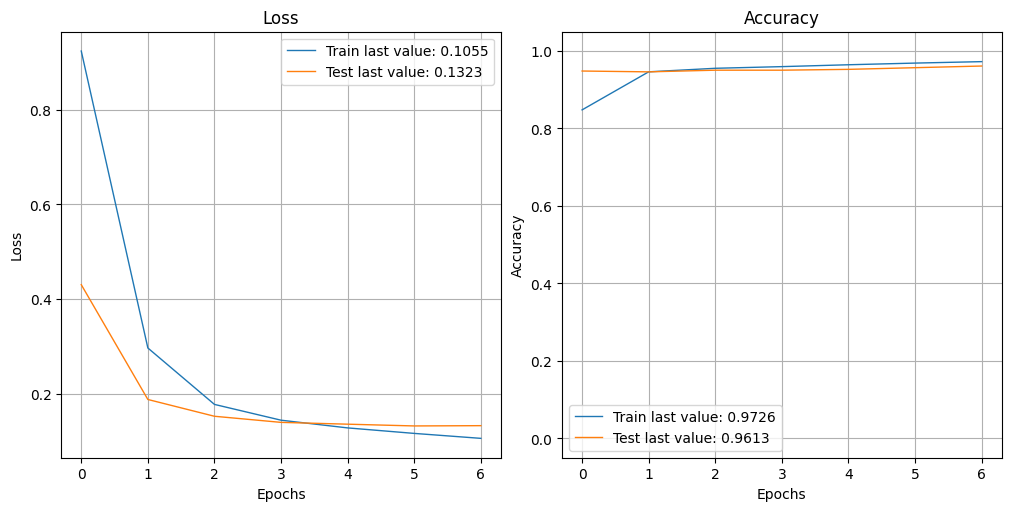

In [7]:
show_history(history)
plot_history(history, path="interpolated.png")
plt.close()

In [8]:


predictions = model.predict(ds_testdir)

2/2 [==============================] - 2s 390ms/step


In [9]:
model.evaluate(ds_testdir)

2/2 [==============================] - 2s 414ms/step - loss: 5.9800 - accuracy: 0.0227


[5.980048656463623, 0.022727273404598236]

In [10]:
print("1. Prediction array: %s" % (predictions[0]))
q = np.argmax(predictions[0])
# we will verify that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % q )

# let us verify what is the label in test_labels.
print("3. Actual label in dataset: %s" % (ds_training.class_names[q]))

1. Prediction array: [0.00567608 0.00623932 0.27037844 0.9978447 ]
2. Label number having highest confidence in prediction array: 3
3. Actual label in dataset: mouse
